In [1]:
%load_ext autoreload
%autoreload

import io
import os
import sys
import django
import glob
import json
import re
import requests
import pandas as pd
from IPython.core.debugger import set_trace
from pathlib import Path
from django.core.files.base import ContentFile
from rest_framework import serializers
from tqdm.notebook import tqdm
from PIL import Image, ImageSequence

parentdir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parentdir)
django.setup()

import getch.models as m

In [26]:
_pix = m.Pix.objects.order_by('id')[0]

In [27]:
_pix.__dict__

{'_state': <django.db.models.base.ModelState at 0x7fe1414d2be0>,
 'id': 118,
 'owner_id': 417,
 'src': 'post/2021/3/12/magrittelim@gmail.com/2021-03-12_115444.089782__blob',
 'desc': '유니폼브릿지 #uniformbridge #자켓 #후드 #코튼 #슬랙스 #카키 #스커트 #화이트 #그레이 #캡 #스니커즈 #블랙',
 'tokens': 'joint photograph white cap street_fashion textile overcoat sleeve standing style collar waist trench_coat headgear hat fashion_design eyewear blazer bag workwear uniform thigh snapshot fur_clothing formal_wear white-collar_worker knee military_uniform event fur fashion_model belt fashion_accessory baseball_cap pattern street luggage_and_bags jewellery 관절 사진 하얀 캡 스트리트패션 직물 외투 소매 서있는 스타일 칼라 허리 트렌치코트 머리장식 모자 패션디자인 안경 블레이저 가방 작업복 제복 대퇴골 스냅사진 모피의류 격식있는옷차림 사무직노동자 무릎 군복 행사 모피 패션모델 벨트 패션액세서리 야구모자 무늬 거리 수하물및가방 보석류 유니폼브릿지 uniformbridge 자켓 후드 코튼 슬랙스 카키 스커트 화이트 그레이 캡 스니커즈 블랙',
 'tokens_ko': '화이트 캡 스트리트 우븐 아우터 티셔츠 스타일리시 칼라풀한 트렌치코트 모자 안경 블레이저 가방 워크웨어 반듯한 모피 포멀한 오피스룩 밀리터리룩 모피 벨트 액세서리 캡 패턴있는 스트리트웨어 여행가방 주얼리 유니폼브릿지 자켓 후드 코튼 슬랙스 카키 스커트 화이트

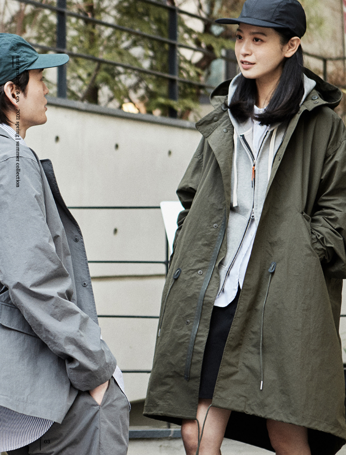

In [28]:
img = Image.open(_pix.src)
img.resize((int(img.width / 2), int(img.height / 2)))

In [71]:
endpoint = 'https://api.omnious.com/tagger/v2.12/tags'
headers = { 
    'x-api-key': 'z75BOQL2oFIepdufKGm8kqYtNnybCVHUZag3XPi6',
    'accept-language': 'ko'
}
json = {
    "image": {
        "type": "url",
#         "content": _pix.src.url
        "content": "https://i.ytimg.com/vi/xrStrPYgqiw/maxresdefault.jpg"
    },
    "context": {
        "id": _pix.id,
        "detection": [
            "TOP",
            "BOTTOM",
            "WHOLEBODY",
            "SWIMWEAR",
            "SHOES",
            "BAG",
            "HAT",
            "JEWELRY",
            "ACCESSORY"
        ],
#         "gender": "남",
#         "brand": "NIKE",
#         "currency": "KRW",
#         "price": 30000,
#         "age": "20대초",
#         "keywords": "블링블링, 테스트",
#         "productContentName": "원피스",
#         "season": "19SS"
    }
}

In [72]:
json

{'image': {'type': 'url',
  'content': 'https://i.ytimg.com/vi/xrStrPYgqiw/maxresdefault.jpg'},
 'context': {'id': 118,
  'detection': ['TOP',
   'BOTTOM',
   'WHOLEBODY',
   'SWIMWEAR',
   'SHOES',
   'BAG',
   'HAT',
   'JEWELRY',
   'ACCESSORY']}}

In [73]:
res = requests.post(endpoint, json=json, headers=headers)

In [74]:
res

<Response [201]>

In [75]:
output = res.json(); output

{'data': {'imageInfo': [],
  'genderInfo': {'id': 'T0575', 'name': '알수없음'},
  'objects': [{'type': 'BAGS',
    'tags': [{'category': {'id': 'T0700', 'name': '가방'},
      'position': {'x': 0.71171874, 'y': 0.29505208},
      'item': {'id': 'T0708', 'name': '메신저백', 'confidence': 0.7307356},
      'colors': [{'id': 'T0324', 'name': '블랙', 'confidence': 0.93306065},
       {'id': 'T0330', 'name': '그레이', 'confidence': 0.92687154}],
      'shape': {'id': 'T1729', 'name': '사각형', 'confidence': 0.48100471},
      'strap': {'id': 'T1727', 'name': '스트랩있음', 'confidence': 0.99843127},
      'size': {'id': 'T1737', 'name': '미니', 'confidence': 0.81032765},
      'colorDetail': [{'code': '#4e5055',
        'name': 'iron-gate',
        'pixelFraction': 0.30289617},
       {'code': '#66676d', 'name': 'quiet-shade', 'pixelFraction': 0.23030226},
       {'code': '#ab9895', 'name': 'sphinx', 'pixelFraction': 0.41355762},
       {'code': '#2d2c2f', 'name': 'jet-black', 'pixelFraction': 0.05324396}],
      'p

In [34]:
output['data']['objects'][0]

{'type': 'CLOTHING',
 'tags': [{'category': {'id': 'T0359', 'name': '점퍼'},
   'position': {'x': 0.6990138, 'y': 0.56347656},
   'item': {'id': 'T0349', 'name': '야상', 'confidence': 0.80409425},
   'colors': [{'id': 'T0339', 'name': '카키', 'confidence': 0.98025846},
    {'id': 'T0330', 'name': '그레이', 'confidence': 0.015564387},
    {'id': 'T0326', 'name': '베이지', 'confidence': 0.0026355572}],
   'length': {'id': 'T0470', 'name': '롱', 'confidence': 0.7120738},
   'sleeveLength': {'id': 'T0082', 'name': '긴팔', 'confidence': 0.98473096},
   'neckLine': {'id': 'T0342', 'name': '후드', 'confidence': 0.90565443},
   'fit': {'id': 'T0479', 'name': '오버사이즈', 'confidence': 0.59441227},
   'shape': None,
   'colorDetail': [{'code': '#5f5b4c',
     'name': 'kalamata',
     'pixelFraction': 0.7136852},
    {'code': '#141414', 'name': 'real-black7', 'pixelFraction': 0.10400125},
    {'code': '#d1d5d0', 'name': 'foggy-dew', 'pixelFraction': 0.09388136},
    {'code': '#54392d', 'name': 'potting-soil', 'pixel

In [35]:
output['data']['objects'][1]

{'type': 'HATS',
 'tags': [{'category': {'id': 'T0800', 'name': '모자'},
   'position': {'x': 0.7564583, 'y': 0.045751955},
   'item': {'id': 'T0834', 'name': '캡', 'confidence': 0.99307525},
   'colors': [{'id': 'T0324', 'name': '블랙', 'confidence': 0.9817254},
    {'id': 'T0333', 'name': '네이비', 'confidence': 0.6402159}],
   'colorDetail': [{'code': '#26262a',
     'name': 'black-beauty',
     'pixelFraction': 0.5422011},
    {'code': '#546477', 'name': 'china-blue', 'pixelFraction': 0.4081506},
    {'code': '#b2ac88', 'name': 'sage-green', 'pixelFraction': 0.037029374},
    {'code': '#6a513b',
     'name': 'coffee-liqueur',
     'pixelFraction': 0.012618949}],
   'prints': [{'id': 'T0824', 'name': '무지', 'confidence': 0.99987006}],
   'textures': [{'id': 'T0807', 'name': '면', 'confidence': 0.9505895}],
   'details': []},
  {'category': {'id': 'T0800', 'name': '모자'},
   'position': {'x': 0.10329949, 'y': 0.13144532},
   'item': {'id': 'T0834', 'name': '캡', 'confidence': 0.86423856},
   'co

In [36]:
output['data']['objects'][2]

IndexError: list index out of range

In [37]:
_pix.taggerlog = output
_pix.save()

In [54]:
def get_value(tag, what):
    try:
        return tag[what]['name']
    except:
        try:
            return tag[what][0]['name']
        except:
            return None

In [77]:
for _obj in output['data']['objects']:
    for _tag in _obj['tags']:
        t = m.Tag(
            pix=_pix,
            type=_obj['type'].lower(),
            category=_tag['category']['name'],
            item=_tag['item']['name']
        )
        
        t.x = _tag['position']['x']
        t.y = _tag['position']['y']
        t.color = get_value(_tag, 'colors')
        t.detail = get_value(_tag, 'details')
        t.pattern = get_value(_tag, 'prints')
        t.texture = get_value(_tag, 'textures')
        t.look = get_value(_tag, 'looks')
        t.length = get_value(_tag, 'length')
        t.sleeve_length = get_value(_tag, 'sleeveLength')
        t.neckline = get_value(_tag, 'neckLine')
        t.fit = get_value(_tag, 'fit')
        t.shape = get_value(_tag, 'shape')
        
        t.heel_height = get_value(_tag, 'heelHeight')
        t.heel_shape = get_value(_tag, 'heelShape')
        t.toe_type = get_value(_tag, 'toeType')
        t.sole_type = get_value(_tag, 'soleType')

        t.strap = get_value(_tag, 'strap') == '스트랩있음'
        t.size = get_value(_tag, 'size')
        t.main_material = get_value(_tag, 'mainMaterials')
        t.sub_material = get_value(_tag, 'subMaterials')

        t.save()

In [76]:
for _obj in output['data']['objects']:
    for _tag in _obj['tags']:
        print(_tag)
        break
    
    break

{'category': {'id': 'T0700', 'name': '가방'}, 'position': {'x': 0.71171874, 'y': 0.29505208}, 'item': {'id': 'T0708', 'name': '메신저백', 'confidence': 0.7307356}, 'colors': [{'id': 'T0324', 'name': '블랙', 'confidence': 0.93306065}, {'id': 'T0330', 'name': '그레이', 'confidence': 0.92687154}], 'shape': {'id': 'T1729', 'name': '사각형', 'confidence': 0.48100471}, 'strap': {'id': 'T1727', 'name': '스트랩있음', 'confidence': 0.99843127}, 'size': {'id': 'T1737', 'name': '미니', 'confidence': 0.81032765}, 'colorDetail': [{'code': '#4e5055', 'name': 'iron-gate', 'pixelFraction': 0.30289617}, {'code': '#66676d', 'name': 'quiet-shade', 'pixelFraction': 0.23030226}, {'code': '#ab9895', 'name': 'sphinx', 'pixelFraction': 0.41355762}, {'code': '#2d2c2f', 'name': 'jet-black', 'pixelFraction': 0.05324396}], 'prints': [{'id': 'T0714', 'name': '무지', 'confidence': 0.9996755}], 'textures': [{'id': 'T0744', 'name': '가죽', 'confidence': 0.99862957}], 'details': [{'id': 'T1716', 'name': '엠보싱로고', 'confidence': 0.11407535}]}


In [51]:
m.Tag(pix=_pix, type='a', category='b', item='c')

<Tag: [118] a | b | c>